# File exploration
- read train data 


In [2]:
import os 
import pandas as pd

In [3]:
base_dir = os.path.join(os.getcwd(), "..")

train_eeg_dir = os.path.join(base_dir, "train_eegs")
train_spc_dir = os.path.join(base_dir, "train_spectrograms")
train_eeg_names = os.listdir(train_eeg_dir)
train_spc_names = os.listdir(train_spc_dir)
len(train_eeg_names), len(train_spc_names)

(17300, 11138)

## EEG example

In [3]:
eeg = pd.read_parquet(os.path.join(train_eeg_dir, train_eeg_names[0]))
eeg

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,-43.270000,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,-43.040001,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,61.000000,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,4.180000,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,-67.480003,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-45.540001,-26.459999,-23.209999,-25.250000,-21.559999,-36.549999,10.730000,-16.290001,-55.919998,-28.670000,-29.770000,-22.000000,3.710000,8.470000,0.480000,9.950000,33.959999,110.510002,58.599998,301.239990
9996,-26.860001,4.350000,7.410000,7.830000,5.260000,7.750000,50.130001,4.150000,1.720000,22.100000,7.150000,-6.820000,38.070000,32.880001,21.990000,32.990002,60.209999,-156.949997,-275.929993,-4634.799805
9997,-133.759995,-111.190002,-119.180000,-105.760002,-130.039993,-104.059998,-68.290001,-86.480003,-57.130001,-68.830002,-95.839996,-107.540001,-86.449997,-94.099998,-97.050003,-86.339996,-68.040001,-14.880000,66.440002,1667.800049
9998,-78.889999,-59.660000,-60.770000,-59.810001,-63.020000,-60.020000,-20.690001,-42.820000,-68.669998,-54.740002,-62.810001,-52.869999,-34.099998,-31.500000,-37.810001,-32.259998,-10.870000,137.559998,193.839996,2743.379883


### Length of each eeg : not all the same

<Axes: >

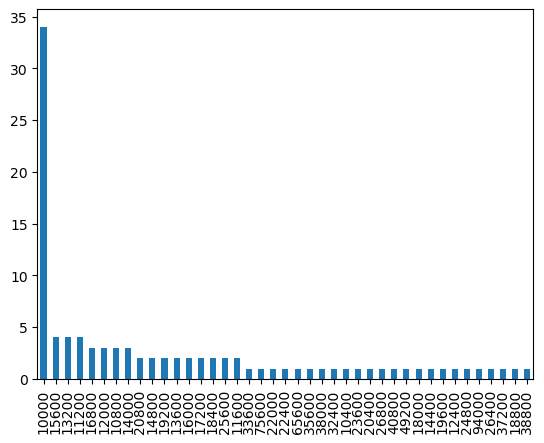

In [4]:
l = []
for i in range(100):
    l.append(len(pd.read_parquet(os.path.join(train_eeg_dir, train_eeg_names[i]))))
pd.Series(l).value_counts().plot(kind="bar")

## Spectrogram example

(313, 401)


<Axes: xlabel='time'>

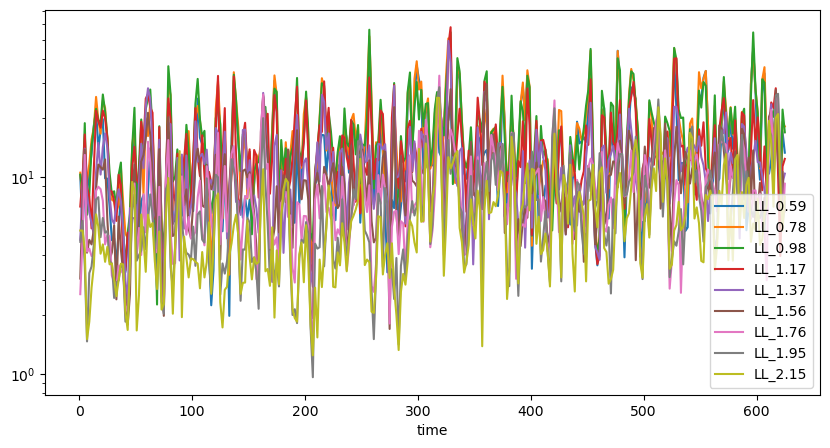

In [14]:
spc = pd.read_parquet(os.path.join(train_spc_dir, train_spc_names[10]))
print(spc.shape)
spc.set_index("time")[spc.columns[1: 10]].plot(figsize=(10,5), logy=True)

## Train 

In [18]:
train = pd.read_csv(os.path.join(base_dir, "train.csv"))
vote_cols = [c for c in train.columns if c.endswith("vote")]
train["n_votes"] = train[vote_cols].sum(axis=1)
print("max number vote : ", train["n_votes"].max())
for c in vote_cols:
    train[c] = train[c] / train["n_votes"]

train

max number vote :  28


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,n_votes
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,3
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,3
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,3
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,3


In [27]:
mean_proba = train[vote_cols].mean(axis=0)
mean_proba = pd.DataFrame(mean_proba).T
mean_proba

,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,0.208319,0.13212,0.128533,0.138913,0.179294,0.212822


## Sample submission

In [28]:
sub = pd.read_csv(os.path.join(base_dir, "sample_submission.csv"))
sub

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


## Test data

In [9]:
test = pd.read_csv(os.path.join(base_dir, "test.csv"))
test

,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


In [10]:
test_eeg = pd.read_parquet(os.path.join(base_dir, "test_eegs", "3911565283.parquet"))

In [12]:
test_eeg.mean(axis=0)

Fp1   -19.990791
F3    -33.769501
C3     12.900561
P3      7.121088
F7    -18.906534
T3    -17.289572
T5    -13.830443
O1     -4.339918
Fz    -32.299442
Cz    -27.798979
Pz    -42.154186
Fp2     1.916800
F4      3.365830
C4    -21.842819
P4    -16.434111
F8    -22.447874
T4    -27.776026
T6      7.697885
O2      2.283027
EKG    27.237782
dtype: float32

## Test submission

In [31]:
test_sub = pd.concat([test[["eeg_id"]], mean_proba], axis=1)
test_sub

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.208319,0.13212,0.128533,0.138913,0.179294,0.212822
